mkdir: ../checkpoints: File exists
--2023-02-23 19:23:01--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
正在解析主机 download.openmmlab.com (download.openmmlab.com)... 116.0.89.205, 116.0.89.209, 116.0.89.207, ...
正在连接 download.openmmlab.com (download.openmmlab.com)|116.0.89.205|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：196205945 (187M) [application/octet-stream]
正在保存至: “../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.3”

pspnet_r50-d8_512x1 100%[===================>] 187.12M   861KB/s  用时 2m 56s    

2023-02-23 19:25:57 (1.06 MB/s) - 已保存 “../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth.3” [196205945/196205945])



In [1]:
import torch
import mmcv
import os
import time
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [2]:
config_file = '../configs/segformer/segformer_mit-b0_8xb1-taco_stuff-512x512.py'
checkpoint_file = '../work_dirs/segformer_mit-b0_8xb1-taco_stuff-512x512/iter_50000.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

# test a single image
img = 'demo.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

/home/zozan-server/Work/FER/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/zozan-server/Work/FER/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../work_dirs/segformer_mit-b0_8xb1-taco_stuff-512x512/iter_50000.pth


In [6]:
num_images = 4
results = []
for i in images[:num_images]: 
    curr_milis = get_current_time_milliseconds()
    result = inference_model(model, i)
    results.append(result)
    print("Inference duration is: {} ms".format(get_current_time_milliseconds() - curr_milis))
    


Inference duration is: 1296 ms
Inference duration is: 109 ms
Inference duration is: 101 ms
Inference duration is: 223 ms


Label: 4	 Color: [0, 64, 64]
Label: 0	 Color: [0, 192, 64]
Label: 16	 Color: [0, 32, 192]
Label: 0	 Color: [0, 192, 64]
Label: 16	 Color: [0, 32, 192]
Label: 13	 Color: [0, 160, 192]
Label: 9	 Color: [128, 192, 64]
Label: 1	 Color: [0, 192, 64]
Label: 0	 Color: [0, 192, 64]


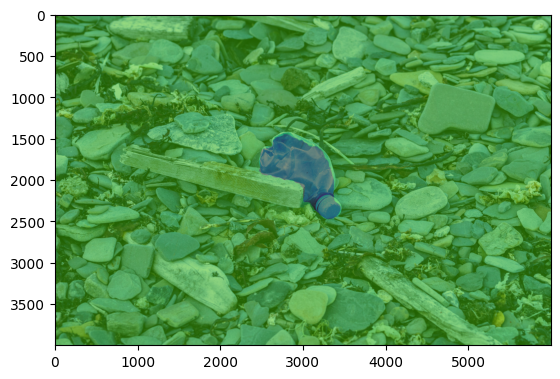

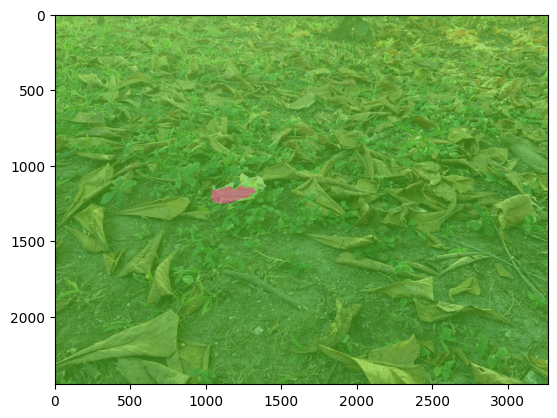

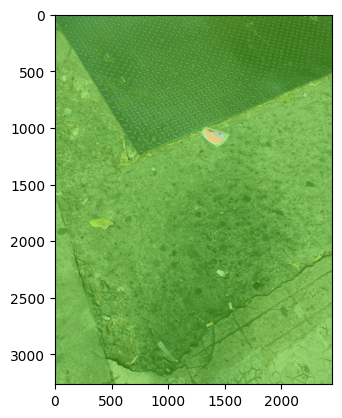

In [9]:
# show the results
for i in range(3): 
    plt.figure(i)
    vis_result = show_result_pyplot(model, images[i], results[i])
    plt.imshow(mmcv.bgr2rgb(vis_result))

In [5]:
img_path = "/home/zozan-server/Work/FER/mmsegmentation/data/TACO/images/train"
images = []
for i in os.listdir(img_path): 
    images.append(os.path.join(img_path, i))
    
def get_current_time_milliseconds():
    return int(time.time() * 1000)